***Introduction***<br>
This project will examine car advertisement data. It analyzes one data set containing information on various cars available for sale.  After loading and cleaning the data, I will identify trends in which car makes, models, conditions, and model years are the most expensive and most economical.
<br><br>
***Importing & Cleaning the Data***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
cars = pd.read_csv('/Users/lydiaethridge/Documents/GitHub/SDT_Project/vehicles_us.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Upon loading the data set, we can see that the data set contains over 50k rows of data. While most columns have data for all entries, model_year, cylinders, odometer, paint_color, and is_4wd have missing data and therefore the set needs a bit of cleaning before analysis can begin in-depth.  Date posted can be converted to date-time format.

In [3]:
cars['date_posted'] = pd.to_datetime(cars['date_posted'])

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


In [5]:
cars

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


A preview of the data shows a fairly clean data set.  I will make all strings in type lowercase for uniformity as there appears to potentially be some variation.  I will also extract makes from models for greater analysis.

In [6]:
cars['type'] = cars['type'].str.lower()
cars

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [7]:
cars['make'] = cars['model'].apply(lambda x: x.split()[0])
cars

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,make
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,chrysler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37,nissan
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22,honda
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32,hyundai
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71,toyota


In [8]:
#checking for duplicate rows
cars[cars.duplicated()].count()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
make            0
dtype: int64

There are no fully duplicate rows.  Each row represents a particular car for sale.  I will now insert filler values in place of missing values.

In [9]:
cars['is_4wd'] = cars['is_4wd'].fillna('0')
cars['model_year'] = cars[['model_year', 'model']].groupby('model').transform(lambda x:x.fillna(x.median()))
cars['cylinders'] = cars[['cylinders', 'model']].groupby('model').transform(lambda x:x.fillna(x.median()))
cars['odometer'] = cars[['odometer', 'condition']].groupby('condition').transform(lambda x:x.fillna(x.mean()))
cars = cars.fillna('Unknown')
cars

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,make
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,suv,Unknown,1.0,2018-06-23,19,bmw
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,183062.233577,automatic,pickup,Unknown,0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,chrysler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37,nissan
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22,honda
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32,hyundai
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71,toyota


In [10]:
cars.describe()

,price,date_posted,days_listed
count,51525.000000,51525,51525.00000
mean,12132.464920,2018-10-25 01:57:46.270742528,39.55476
min,1.000000,2018-05-01 00:00:00,0.00000
25%,5000.000000,2018-07-29 00:00:00,19.00000
50%,9000.000000,2018-10-25 00:00:00,33.00000
75%,16839.000000,2019-01-21 00:00:00,53.00000
max,375000.000000,2019-04-19 00:00:00,271.00000
std,10040.803015,NaN,28.20427


In [11]:
cars['model'].nunique()

100

In [12]:
cars['type'].nunique()

13

In [13]:
cars['paint_color'].nunique()

13

***Initial Conclusions***<br>
Overall, this is a clean data set, and I can proceed to draw some conclusions about it.

The cars range in price from $1 to $375k, though the average price is around $12k.  The average car at the time of collecting this data had been listed for almost 40 days on average.  The data set contains information on 100 unique  makes and models of 13 different types and colors.

With these conclusions in mind, I'll explore the number of cars available per make and type, the condition of available cars per model year, determine the most expensive and most affordable makes on average, compare the price distribution between makes, determine average price per model year, and average price based on vehicle condition.

***Exploratory Analysis***

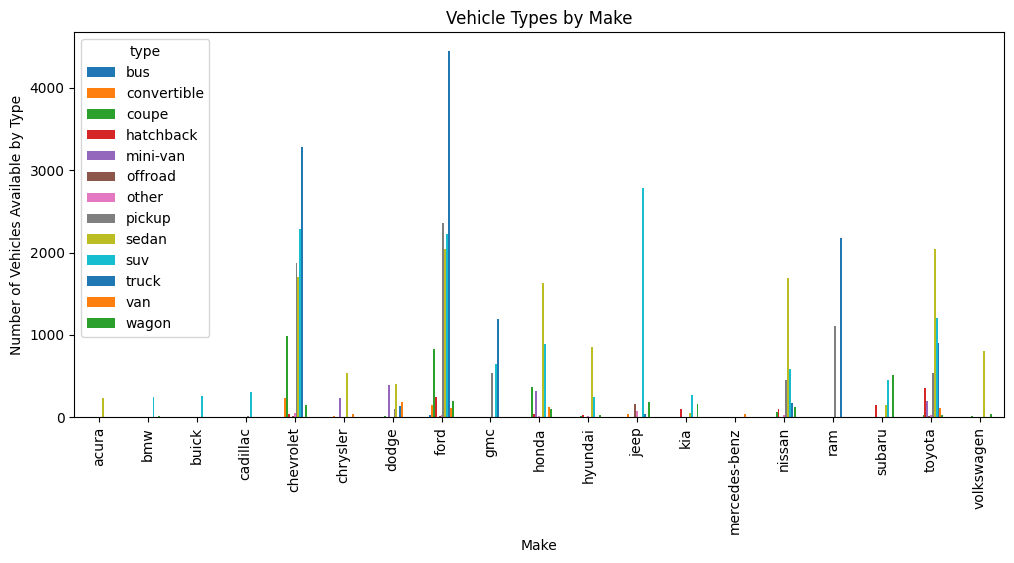

In [14]:
cars_tpma = cars.groupby(['make', 'type']).agg(total_types=('type', 'count')).reset_index()
cars_tpma_pivot = cars_tpma.pivot(index='make', columns='type', values='total_types')
cars_tpma_pivot.plot(kind='bar', title='Vehicle Types by Make', xlabel='Make', ylabel='Number of Vehicles Available by Type', figsize=[12, 5])
plt.show()

This histogram allows us to visually identify the 5 most common types and makes of vehicle available.  There are:<br>
1.) Over 4000 Ford trucks<br>
2.) Over 3000 Chevrolet trucks<br>
3.) Nearly 3000 Jeep SUVs<br>
4.) Around 2000 Ram trucks<br>
5.) Nearly 2000 Toyota sedans<br>
We can clarify these numbers now with a targeted query.<br>
<br>
It is also worth noting that Acura, BMW, Buick, Cadillac, Chrystler, Dodge, Kia, Mercedez-Benz, Subaru, and Volkswagen have very limited representation in the data set.

In [15]:
cars_tpma_pivot_filtered = cars_tpma_pivot.iloc[[7, 4, 11, 15, 17], [-3, -3, -4, -3, -5]]
cars_tpma_pivot_filtered

type,truck,truck,suv,truck,sedan
make,,,,,
ford,4452.0,4452.0,2222.0,4452.0,2047.0
chevrolet,3277.0,3277.0,2285.0,3277.0,1700.0
jeep,34.0,34.0,2780.0,34.0,4.0
ram,2181.0,2181.0,3.0,2181.0,1.0
toyota,896.0,896.0,1208.0,896.0,2045.0


The top 5 make/type combinations are:<br>
1.) Ford Truck: 4452 listings<br>
2.) Chevrolet Truck: 3277 listings<br>
3.) Jeep SUV: 2780 listings<br>
4.) Ram Truck: 2181 listings<br>
5.) Toyota Sedan: 2045 listings

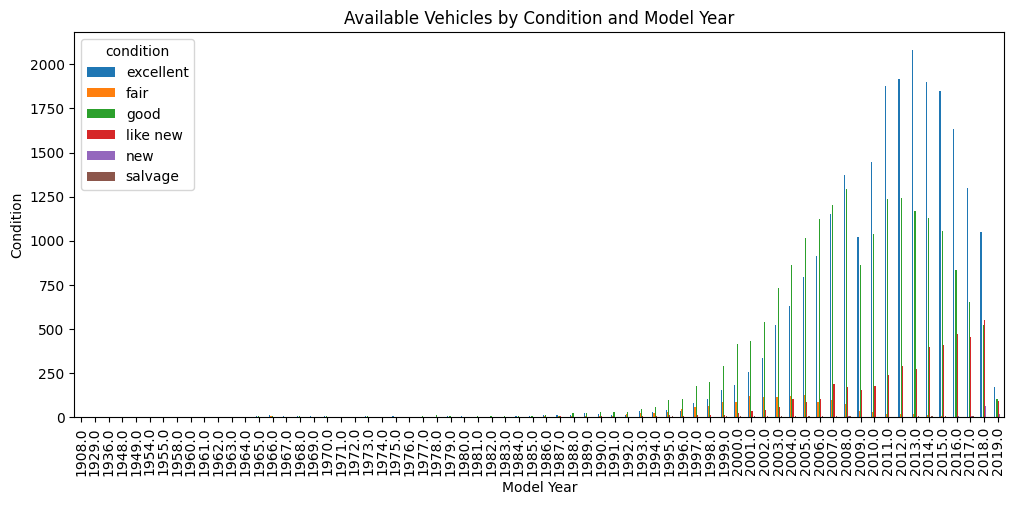

In [16]:
cars_cpmy = cars.groupby(['model_year', 'condition']).agg(total_cond=('condition', 'count')).drop('Unknown').reset_index()
cars_cpmy_pivot = cars_cpmy.pivot(index='model_year', columns='condition', values='total_cond')
cars_cpmy_pivot.plot(kind='bar', title='Available Vehicles by Condition and Model Year', xlabel='Model Year', ylabel='Condition', figsize=[12, 5])
plt.show()

The number of used cars available is clustered around cars around 7 years old at the time this data set was collected.  This makes sense as many cars would be paid for (if initially financed) by that point and owners may be ready to sell and buy something new.  The number of like new cars increases approaching the year this data was collected, while the availability of cars in excellent and good condition also increases the newer the car (though availability of cars in these conditions declines some within the past seven years to account for more cars in "like new" condition being on the market).

I will now explore which makes are the most expensive and the most economical on average.

In [17]:
cars_ppm = cars.groupby('make').agg(avg_price=('price', 'mean')).reset_index()
cars_ppm

,make,avg_price
0,acura,6474.500000
1,bmw,10695.891386
2,buick,11439.612546
3,cadillac,17032.059006
4,chevrolet,14333.427104
5,chrysler,8182.738663
6,dodge,8067.058167
7,ford,12697.651989
8,gmc,15602.340622
9,honda,7317.624103


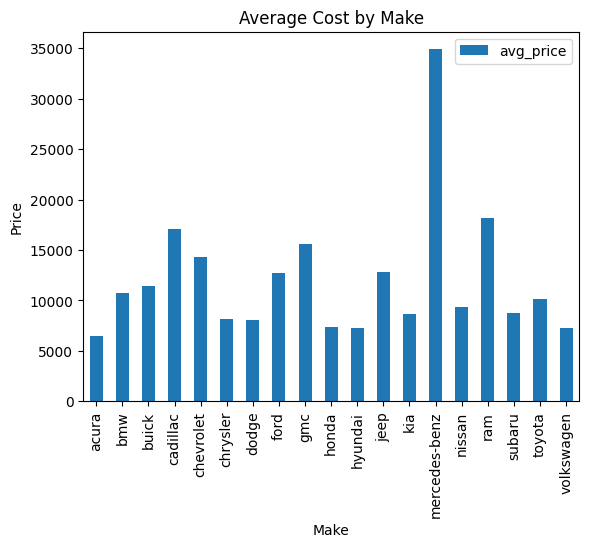

In [29]:
cars_ppm.plot(kind='bar', title='Average Cost by Make', xlabel='Make', ylabel='Price', x='make', y='avg_price')
plt.show()

Unsurprisingly, Mercedes-Benz are, on average, the most expensive cars available with an average price of $34,900.  Ram, Cadillac, GMC, and Chevrolet round out the top 5, but are significantly cheaper, averaging $14-18k.  The most economical cars are Acura, Honda, Hyundai, Dodge, and Volkswagen, averaging around $8k or less.

Given the Mercedez-Benz is so much more expensive than the other most expensive cars, it is worth taking a closer look at the data specifically for Mercedez-Benz.

In [19]:
cars[cars['make'] == 'mercedes-benz'].describe()

,price,date_posted,days_listed
count,41.0,41,41.000000
mean,34900.0,2018-11-04 06:26:20.487804928,38.560976
min,34900.0,2018-05-18 00:00:00,1.000000
25%,34900.0,2018-08-23 00:00:00,20.000000
50%,34900.0,2018-10-16 00:00:00,34.000000
75%,34900.0,2019-01-28 00:00:00,50.000000
max,34900.0,2019-04-18 00:00:00,99.000000
std,0.0,NaN,23.480895


It would appear there are 41 Mercedez-Benz listed, all at a price of exactly $34,900.  Are these duplicate listings?  Let's check them!

In [20]:
mb = cars[cars['make'] == 'mercedes-benz']
mb.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,make
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,Unknown,automatic,van,black,Unknown,2019-01-15,16,mercedes-benz
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,Unknown,automatic,van,black,Unknown,2018-12-04,36,mercedes-benz
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,Unknown,automatic,van,black,Unknown,2018-08-23,70,mercedes-benz
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,Unknown,automatic,van,black,Unknown,2019-04-12,31,mercedes-benz
4149,34900,Unknown,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,Unknown,automatic,van,black,Unknown,2018-10-12,28,mercedes-benz


Although I have truncated the list for simplicity, yes, they are seemingly all the same black 2013 Sprinter van.  It is worth keeping in mind that there are likely other duplicate entries in the data set.  However, given none of the vehicles have a VIN or other number uniquely identifying them and information is unknown in some listings, there is no way to cleanly and safely remove duplicates without inadvertently dropping non-duplicates.

To help in identifying which makes this is most likely true of, I will plot the distribution of price by make.

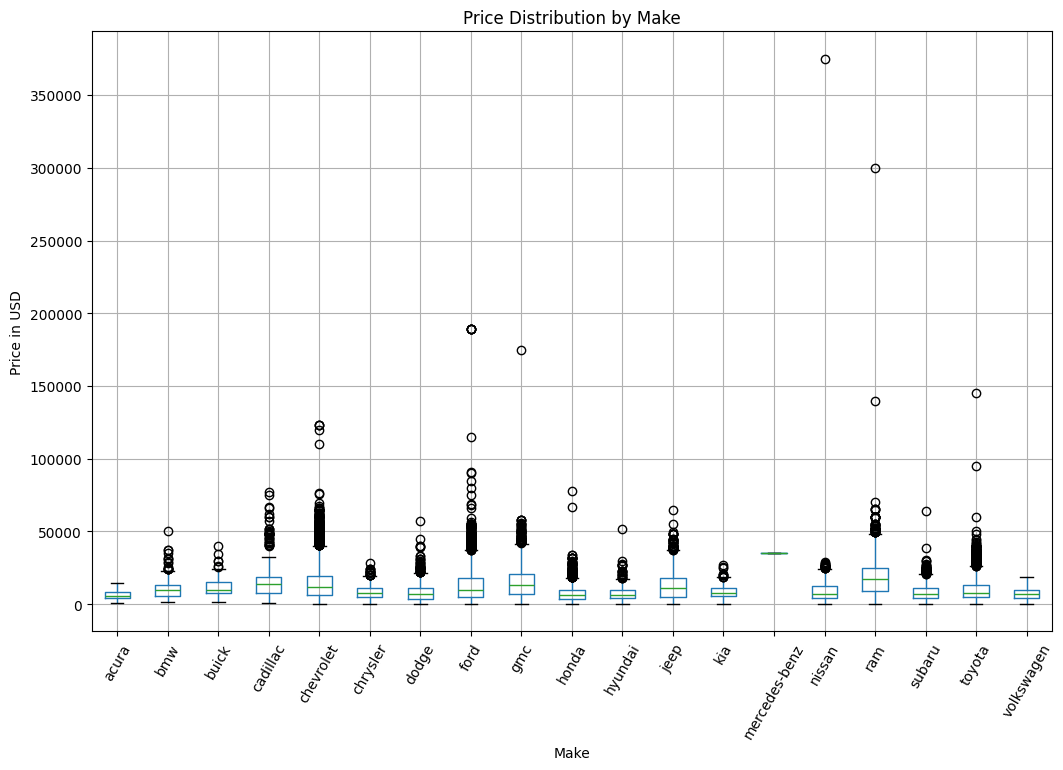

In [21]:
cars.boxplot(column='price', by='make', figsize=(12, 8), rot=60)
plt.title('Price Distribution by Make')
plt.suptitle('')
plt.xlabel('Make')
plt.ylabel('Price in USD')
plt.show()

The boxplot helps to identify some helpful information about the dataset.

First, seemingly only Mercedes-Benz consists of exclusively duplicates, as all other makes have some degree of distribution.

Second, we can see several extreme outliers in the data set for Ford, GMC, Nissan, and Ram.  This indicates that the averages for these makes may not truly reflect the average price of the majority of vehicles of that make available and median is a better indicator of typical price.  This is particularly true in the case of Nissan, which the median reveals is in fact among the most economical makes.

Third, we can tell that overall, median price is fairly similar for most makes.  After Mercedes-Benz, Ram has the highest median price, indicating that it is consistently one of the most expensive makes available.  The same is true of the other most expensive brands identified by their mean, indicating that their higher average is not merely the result of outliers: Cadillac, GMC, and Chevrolet.  As for the most economical makes, their medians are fairly comparable to most other makes, though they do trend slightly lower, consistent with their means.

Finally, we can identify which makes have the widest and narrowest range in price.  Chevrolet, Ford, GMC, Jeep, and Ram have the widest range in price, while Acura, Chrystler, Dodge, Honda, Hyundai, Kia, Subaru, and Volkswagen have the narrowest (I excluded Mercedes-Benz).  The makes in the widest range are best known for their trucks and SUVs, while the makes in the narrowest range are better known for their sedans.  I will quickly check if this is the case.

In [22]:
makes_wide_range = ['chevrolet', 'ford', 'gmc', 'jeep', 'ram']
types_high_range = cars[cars['make'].isin(makes_wide_range)].groupby('type').size()
types_high_range

type
bus               23
convertible      431
coupe           1813
hatchback        283
mini-van           3
offroad          192
other            165
pickup          5880
sedan           3752
suv             7932
truck          11132
van              127
wagon            525
dtype: int64

In [23]:
makes_narrow_range = ['acura', 'chrystler', 'dodge', 'honda', 'hyundai', 'kia', 'subaru', 'volkswagen']
types_narrow_range = cars[cars['make'].isin(makes_narrow_range)].groupby('type').size()
types_narrow_range

type
bus               1
convertible       1
coupe           397
hatchback       318
mini-van        719
offroad           4
other            40
pickup          105
sedan          4117
suv            1869
truck           143
van             315
wagon           846
dtype: int64

Indeed.  The majority of cars in the wide range are trucks and SUVs, while the majority of cars in the narrow range are sedans.

I will now plot the average price per model year to see how age affects value.

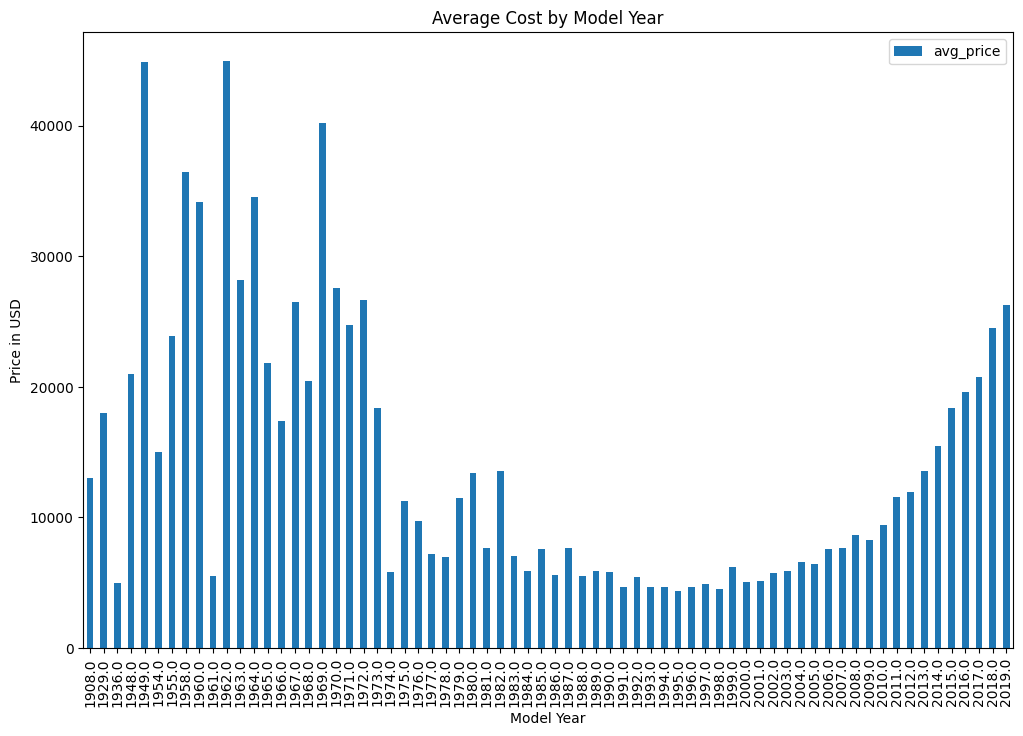

In [24]:
cars_ppmy = cars.groupby('model_year').agg(avg_price=('price', 'mean')).drop('Unknown').reset_index()
cars_ppmy.plot(kind='bar', title='Average Cost by Model Year', xlabel='Model Year', ylabel='Price in USD', x='model_year', y='avg_price', rot=90, figsize=(12, 8))
plt.show()

For this data set, age has the expected effect on price.  Cars produced within the past ten years increase slightly in value for every year newer they are.  Cars 10-45 years old are generally fairly inexpensive, though some mid-70s to early-80s cars appear to be more valuable than most of the cars in that range.  With some exceptions (1936 and 1961), cars 46 years and older are among the most valuable vehicles in the data set, presumably due to their "classic car" status.  There are most likely fewer of these cars, which may impact the data.

In [25]:
num_cars_yr = cars.groupby('model_year').size()
num_cars_yr.head(10)

model_year
1908.0    2
1929.0    1
1936.0    1
1948.0    1
1949.0    1
1954.0    1
1955.0    1
1958.0    2
1960.0    3
1961.0    1
dtype: int64

In [26]:
num_cars_yr.tail(10).drop('Unknown')

model_year
2011.0    3375
2012.0    3468
2013.0    3549
2014.0    3448
2015.0    3323
2016.0    2954
2017.0    2419
2018.0    2193
2019.0     380
dtype: int64

Indeed, there are far fewer "classic cars" than newer cars, meaning that average price for those years is based on 1-3 cars, thus also increasing their value due to their rarity.

Lastly, I will plot average price based on vehicle condition.

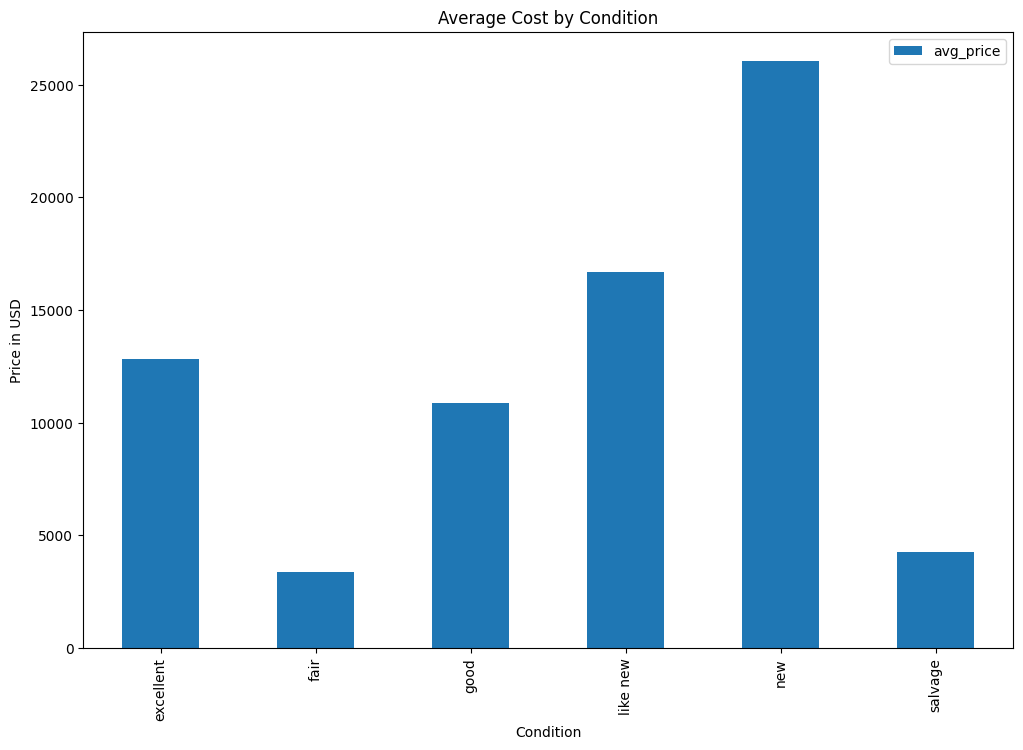

In [27]:
condition_order = ['new', 'like new', 'excellent', 'good', 'fair', 'salvage']
cars_apbc = cars.groupby('condition').agg(avg_price=('price', 'mean')).reset_index()
cars_apbc.plot(kind='bar', title='Average Cost by Condition', xlabel='Condition', ylabel='Price in USD', x='condition', y='avg_price', rot=90, figsize=(12, 8))
plt.show()

As expected, new cars have the highest average price, followed by like new, excellent, good, salvage, and fair.  Salvage, surprisingly, is worth slightly more than a fair car, though this could be due to the fact that a car in fairly good condition might be totalled but still contain several valuable parts.

***Conclusion***<br>
This data set showcases a variety of used cars and seems fairly typical.  Of the over 51k vehicles listed for sale, the set includes 100 unique makes and models of 13 different types and colors.  The most commonly available vehicles are Ford trucks, Chevrolet trucks, Jeep SUVs, Ram trucks, and Toyota sedans, though it is worth noting that some duplicate listings were identified but impossible to safely purge from the data set due to lack of unique identifiers for vehicles, therefore rendering this a tentative conclusion.  Most other makes, particularly those best known for their sedans, had limited representation.

While there are some extreme outliers, the average price is around $12k and the average age is 7 years old, likely due to typical financing periods.  The most expensive makes on average are Ram, Cadillac, GMC, and Chevrolet, priced $14k-18k on average.  GMC and Ram had extreme outliers, but also had high median prices, confirming they are consistently expensive.  Mercedes-Benz had the highest average price just under $35k, but this seems to be indicative of only one vehicle with multiple listings.  The most economical makes are Acura, Honda, Hyundai, Dodge, and Volkswagen, all averaging $8k or less.  In general, makes known for trucks and SUVs have wider price ranges, whereas makes known for sedans have narrower ranges.

Age and condition impact price as expected.  Prices increase with each model year for cars under 10 years old, while cars 10-45 years old are generally cheaper, with some exceptions for mid-70s to early-80s cars.  Classic Cars 46+ years old are among the most valuable, likely due to their rarity.  The impact of condition on price is overall as expected, though salvage cars are worth slightly more than fair cars, perhaps due to valuable parts.